In [1]:
import torch

import utils.config as config
from cnn.vgg import *
from utils.loadData import *
from utils.tools import *

import warnings 
warnings.filterwarnings("ignore") 

In [2]:
print(config.num_classes)

10


In [3]:
# torch.rand 返回一个 [0,1) 之间的均匀分布
x = torch.rand(size=(2,3,227,227))
net = vgg16(init_weights=False,num_classes = config.num_classes,dropout=config.dropout)
net(x).shape[0]

2

In [6]:
net

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

加载数据集
1. fashion_mnist
2. CIFAR10

In [4]:
# train_iter, test_iter = load_data_fashion_mnist(batch_size=config.batch_size,resize=config.resize)
train_iter, test_iter = load_data_cifar10(batch_size=config.batch_size,resize=config.resize)

Files already downloaded and verified
Files already downloaded and verified


开始训练

training on cuda:0
Epoch: 0/10


OutOfMemoryError: CUDA out of memory. Tried to allocate 392.00 MiB (GPU 0; 4.00 GiB total capacity; 2.78 GiB already allocated; 0 bytes free; 3.11 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

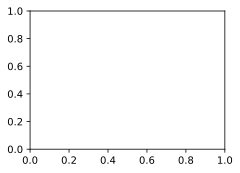

In [5]:
train_ch6(net, train_iter, test_iter, config.num_epochs, config.lr, try_gpu())